In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
%pwd

'/Users/rahulshelke/Documents/Data-Science/Hands-on DL/optimizer_model_comparison/notebooks'

In [3]:
os.chdir("../")

In [4]:
%pwd

'/Users/rahulshelke/Documents/Data-Science/Hands-on DL/optimizer_model_comparison'

## Exponential Weighted Average

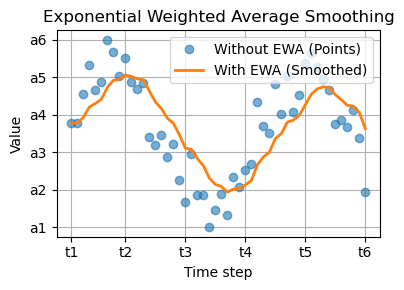

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Create directory if it doesn't exist
os.makedirs('results', exist_ok=True)

# Simulate noisy data
np.random.seed(42)
x = np.arange(0, 50)
y = np.sin(0.2 * x) + np.random.normal(0, 0.3, size=len(x))  # Noisy data

# Exponential Weighted Average (EWA) function
def exponential_weighted_average(data, alpha):
    ewa = np.zeros_like(data)
    ewa[0] = data[0]
    for t in range(1, len(data)):
        ewa[t] = alpha * data[t] + (1 - alpha) * ewa[t-1]
    return ewa

# Compute EWA
alpha = 0.2
y_ewa = exponential_weighted_average(y, alpha)

# Plot
plt.figure(figsize=(4, 3))
plt.plot(x, y, 'o', label='Without EWA (Points)', alpha=0.6)
plt.plot(x, y_ewa, '-', linewidth=2, label='With EWA (Smoothed)')

# Customize x-ticks and y-ticks
xticks_idx = np.linspace(0, len(x)-1, 6, dtype=int)
yticks_vals = np.linspace(min(y.min(), y_ewa.min()), max(y.max(), y_ewa.max()), 6)

plt.xticks(ticks=xticks_idx, labels=[f"t{i+1}" for i in range(len(xticks_idx))])
plt.yticks(ticks=yticks_vals, labels=[f"a{i+1}" for i in range(len(yticks_vals))])

plt.title('Exponential Weighted Average Smoothing')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot as an image
plt.savefig('results/ewa_smoothing_plot.png', dpi=100)

# Show the plot
plt.show()


## Plateau State

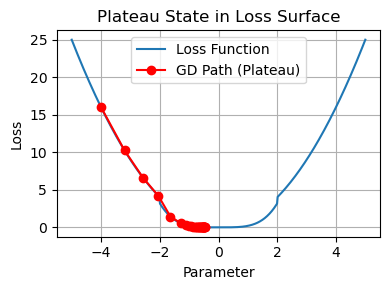

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Create output directory
os.makedirs('results', exist_ok=True)

# Define a loss function with a plateau
def loss_function(x):
    return np.where(np.abs(x) < 2, 0.2 * x**4, x**2)

# Gradient of the loss function
def loss_gradient(x):
    return np.where(np.abs(x) < 2, 0.8 * x**3, 2 * x)

# Simulate gradient descent
x_vals = []
x = -4.0  # Starting point
learning_rate = 0.1

for _ in range(30):
    x_vals.append(x)
    grad = loss_gradient(x)
    x = x - learning_rate * grad

# Plot the loss surface and the optimization path
x_range = np.linspace(-5, 5, 500)
y_range = loss_function(x_range)

plt.figure(figsize=(4, 3))
plt.plot(x_range, y_range, label='Loss Function')
plt.plot(x_vals, loss_function(np.array(x_vals)), 'o-', label='GD Path (Plateau)', color='red')

plt.title('Plateau State in Loss Surface')
plt.xlabel('Parameter')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig('results/plateau_state.png', dpi=100)

# Show the plot
plt.show()


/var/folders/8y/3b6b9p6d5vjg7ql8yvqrf69w0000gn/T/ipykernel_2473/1677591017.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


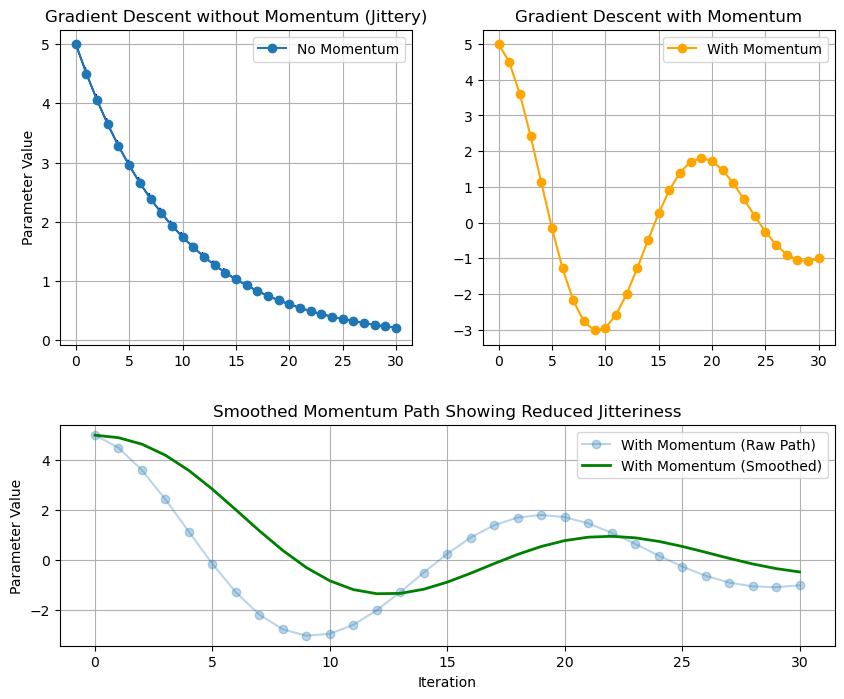

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Quadratic function and gradient
def f(x):
    return 0.5 * x**2

def grad_f(x):
    return x

# Gradient Descent without momentum
def gd_no_momentum(x0, lr, steps):
    x = x0
    path = [x]
    for _ in range(steps):
        x = x - lr * grad_f(x)
        path.append(x)
    return np.array(path)

# Gradient Descent with momentum
def gd_with_momentum(x0, lr, steps, momentum):
    x = x0
    v = 0
    path = [x]
    for _ in range(steps):
        v = momentum * v + lr * grad_f(x)
        x = x - v
        path.append(x)
    return np.array(path)

# Parameters
x0 = 5.0
lr = 0.1
steps = 30
momentum = 0.9

# Get paths
path_no_mom = gd_no_momentum(x0, lr, steps)
path_mom = gd_with_momentum(x0, lr, steps, momentum)

# Smooth the momentum path with simple EWMA for visualization
def smooth_path(path, alpha=0.2):
    smoothed = np.zeros_like(path)
    smoothed[0] = path[0]
    for t in range(1, len(path)):
        smoothed[t] = alpha * path[t] + (1 - alpha) * smoothed[t-1]
    return smoothed

path_mom_smooth = smooth_path(path_mom)

# Plotting with GridSpec to span bottom plot across both columns
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 0.7], hspace=0.3)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])  # Span both columns

# No momentum (top-left) with jittery arrows
ax1.plot(path_no_mom, 'o-', label='No Momentum')
ax1.set_title("Gradient Descent without Momentum (Jittery)")
ax1.set_ylabel("Parameter Value")
ax1.grid(True)
ax1.legend()

# Add arrows to show jitter direction
for i in range(len(path_no_mom)-1):
    ax1.arrow(i, path_no_mom[i], 1, path_no_mom[i+1] - path_no_mom[i],
              head_width=0.1, head_length=0.15, fc='blue', ec='blue', length_includes_head=True)

# With momentum (top-right)
ax2.plot(path_mom, 'o-', color='orange', label='With Momentum')
ax2.set_title("Gradient Descent with Momentum")
ax2.grid(True)
ax2.legend()

# Smoothed momentum path spanning bottom
ax3.plot(path_mom, 'o-', alpha=0.3, label='With Momentum (Raw Path)')
ax3.plot(path_mom_smooth, '-', linewidth=2, color='green', label='With Momentum (Smoothed)')
ax3.set_title("Smoothed Momentum Path Showing Reduced Jitteriness")
ax3.set_xlabel("Iteration")
ax3.set_ylabel("Parameter Value")
ax3.grid(True)
ax3.legend()

plt.tight_layout()
plt.show()


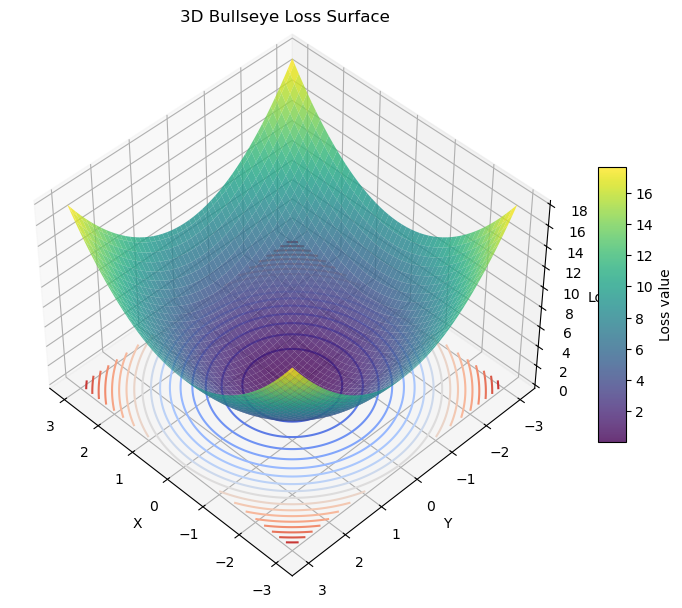

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting

# Define a 2D quadratic bowl (loss surface)
def loss_surface(x, y):
    return x**2 + y**2

# Create grid
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = loss_surface(X, Y)

# Create figure and 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')

# Add contour lines projected on XY plane
contours = ax.contour(X, Y, Z, 20, cmap='coolwarm', offset=0)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Loss')
ax.set_title('3D Bullseye Loss Surface')

# Set viewing angle for better bullseye effect
ax.view_init(elev=45, azim=135)

# Color bar for surface
fig.colorbar(surf, shrink=0.5, aspect=10, label='Loss value')

plt.tight_layout()
plt.show()


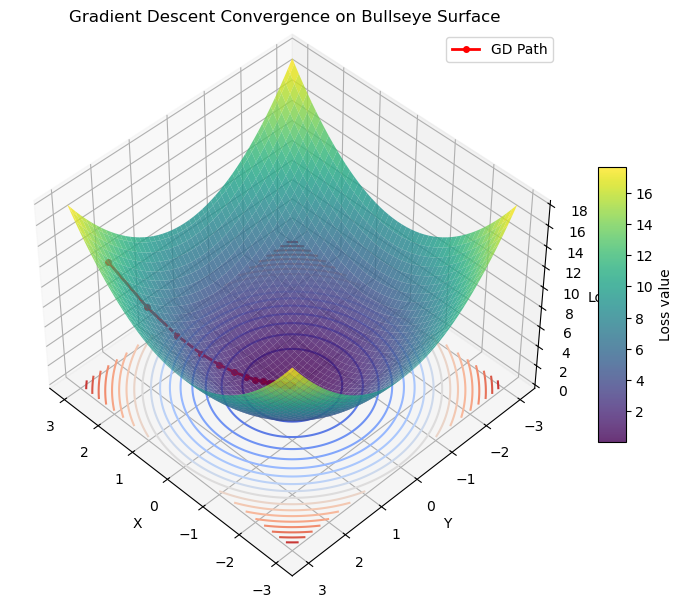

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Loss function and gradient
def loss_surface(x, y):
    return x**2 + y**2

def grad_loss(x, y):
    return np.array([2*x, 2*y])

# Gradient Descent parameters
lr = 0.1
steps = 30
start_point = np.array([2.5, 2.5])  # starting away from minimum

# Store the path
path = [start_point]
point = start_point.copy()

for _ in range(steps):
    grad = grad_loss(point[0], point[1])
    point = point - lr * grad
    path.append(point)

path = np.array(path)

# Create grid for surface
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = loss_surface(X, Y)

# Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')

# Contour lines projected on XY plane
ax.contour(X, Y, Z, 20, cmap='coolwarm', offset=0)

# Gradient descent path (3D)
ax.plot(path[:, 0], path[:, 1], loss_surface(path[:, 0], path[:, 1]),
        color='red', marker='o', label='GD Path', markersize=4, linewidth=2)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Loss')
ax.set_title('Gradient Descent Convergence on Bullseye Surface')

# Viewing angle
ax.view_init(elev=45, azim=135)

# Color bar
fig.colorbar(surf, shrink=0.5, aspect=10, label='Loss value')

ax.legend()
plt.tight_layout()
plt.show()


AttributeError: 'Axes3D' object has no attribute 'w_xaxis'

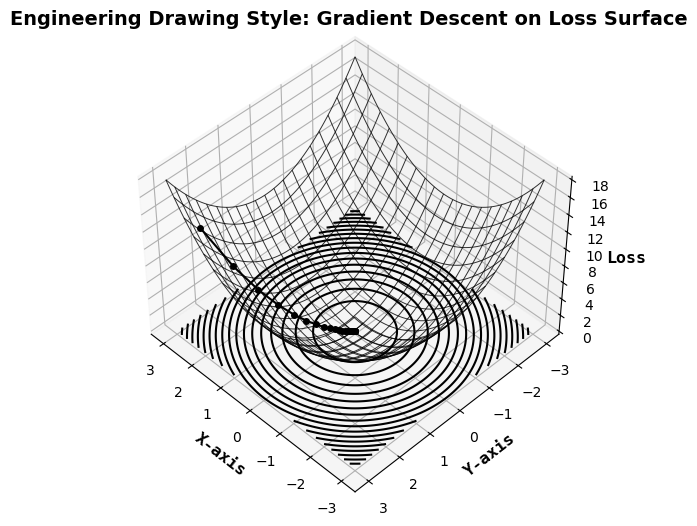

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Loss function and gradient
def loss_surface(x, y):
    return x**2 + y**2

def grad_loss(x, y):
    return np.array([2*x, 2*y])

# Gradient Descent parameters
lr = 0.1
steps = 30
start_point = np.array([2.5, 2.5])  # starting away from minimum

# Store the path
path = [start_point]
point = start_point.copy()

for _ in range(steps):
    grad = grad_loss(point[0], point[1])
    point = point - lr * grad
    path.append(point)

path = np.array(path)

# Create grid for surface
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = loss_surface(X, Y)

# Plotting with engineering style
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Wireframe surface (no face color)
ax.plot_wireframe(X, Y, Z, color='black', linewidth=0.7, rstride=5, cstride=5, alpha=0.8)

# Contour lines projected on XY plane with solid black lines
ax.contour(X, Y, Z, 20, colors='black', linestyles='solid', offset=0)

# Gradient descent path (3D) with black points and line
ax.plot(path[:, 0], path[:, 1], loss_surface(path[:, 0], path[:, 1]),
        color='black', marker='o', label='GD Path', markersize=4, linewidth=1.5)

# Axes labels with engineering font style (monospace)
ax.set_xlabel('X-axis', fontsize=12, fontweight='bold', family='monospace')
ax.set_ylabel('Y-axis', fontsize=12, fontweight='bold', family='monospace')
ax.set_zlabel('Loss', fontsize=12, fontweight='bold', family='monospace')
ax.set_title('Engineering Drawing Style: Gradient Descent on Loss Surface', fontsize=14, fontweight='bold')

# Viewing angle for clear schematic look
ax.view_init(elev=45, azim=135)

# Set grid and background to white (clean)
ax.grid(True, color='gray', linestyle='--', linewidth=0.5)
ax.w_xaxis.line.set_color('black')
ax.w_yaxis.line.set_color('black')
ax.w_zaxis.line.set_color('black')

# Legend in black and white
ax.legend(frameon=False, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


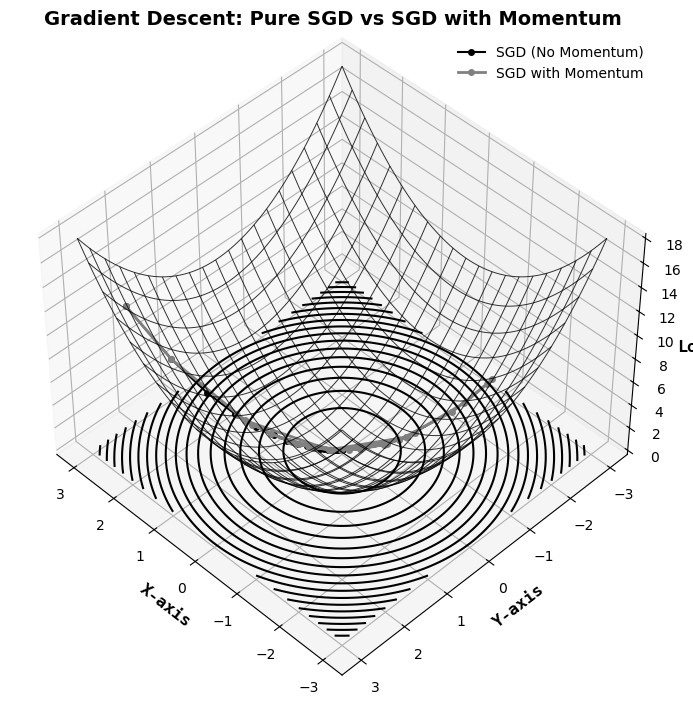

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Loss function and gradient
def loss_surface(x, y):
    return x**2 + y**2

def grad_loss(x, y):
    return np.array([2*x, 2*y])

# Pure SGD (no momentum)
def gd_no_momentum(start, lr, steps):
    point = start.copy()
    path = [point]
    for _ in range(steps):
        grad = grad_loss(point[0], point[1])
        point = point - lr * grad
        path.append(point)
    return np.array(path)

# SGD with momentum
def gd_with_momentum(start, lr, steps, momentum=0.9):
    point = start.copy()
    v = np.array([0.0, 0.0])
    path = [point]
    for _ in range(steps):
        grad = grad_loss(point[0], point[1])
        v = momentum * v + lr * grad
        point = point - v
        path.append(point)
    return np.array(path)

# Parameters
lr = 0.1
steps = 30
start_point = np.array([2.5, 2.5])

# Paths
path_sgd = gd_no_momentum(start_point, lr, steps)
path_momentum = gd_with_momentum(start_point, lr, steps, momentum=0.9)

# Create grid for surface
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = loss_surface(X, Y)

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Wireframe surface
ax.plot_wireframe(X, Y, Z, color='black', linewidth=0.7, rstride=5, cstride=5, alpha=0.8)

# Contour lines on XY plane
ax.contour(X, Y, Z, 20, colors='black', linestyles='solid', offset=0)

# Pure SGD path
ax.plot(path_sgd[:, 0], path_sgd[:, 1], loss_surface(path_sgd[:, 0], path_sgd[:, 1]),
        color='black', marker='o', label='SGD (No Momentum)', markersize=4, linewidth=1.5)

# SGD with momentum path
ax.plot(path_momentum[:, 0], path_momentum[:, 1], loss_surface(path_momentum[:, 0], path_momentum[:, 1]),
        color='gray', marker='o', label='SGD with Momentum', markersize=4, linewidth=2)

# Labels and title with engineering style fonts
ax.set_xlabel('X-axis', fontsize=12, fontweight='bold', family='monospace')
ax.set_ylabel('Y-axis', fontsize=12, fontweight='bold', family='monospace')
ax.set_zlabel('Loss', fontsize=12, fontweight='bold', family='monospace')
ax.set_title('Gradient Descent: Pure SGD vs SGD with Momentum', fontsize=14, fontweight='bold')

# Viewing angle
ax.view_init(elev=45, azim=135)

# Grid and axes lines
ax.grid(True, color='gray', linestyle='--', linewidth=0.5)
# ax.w_xaxis.line.set_color('black')
# ax.w_yaxis.line.set_color('black')
# ax.w_zaxis.line.set_color('black')

ax.legend(frameon=False, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


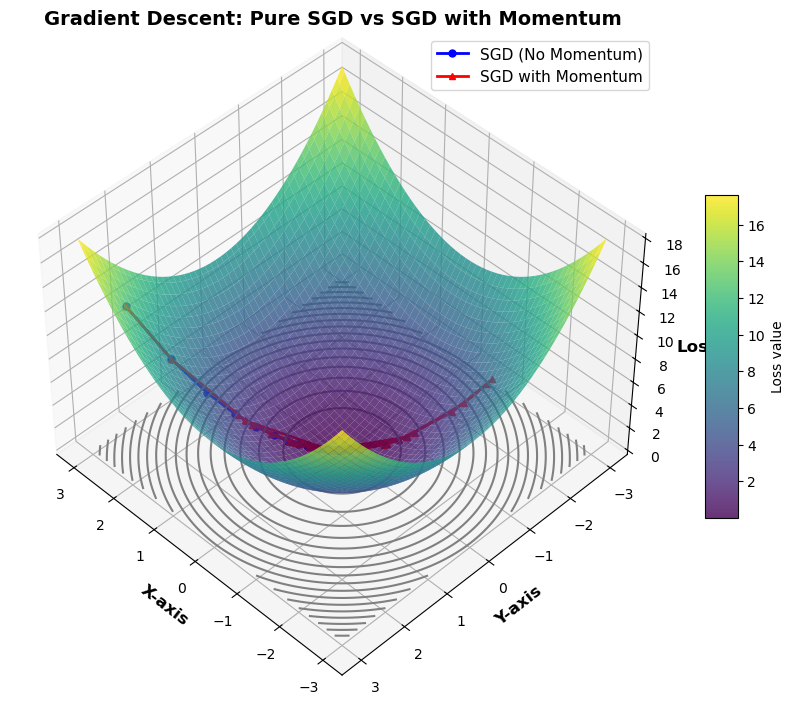

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Loss function and gradient
def loss_surface(x, y):
    return x**2 + y**2

def grad_loss(x, y):
    return np.array([2*x, 2*y])

# Pure SGD (no momentum)
def gd_no_momentum(start, lr, steps):
    point = start.copy()
    path = [point]
    for _ in range(steps):
        grad = grad_loss(point[0], point[1])
        point = point - lr * grad
        path.append(point)
    return np.array(path)

# SGD with momentum
def gd_with_momentum(start, lr, steps, momentum=0.9):
    point = start.copy()
    v = np.array([0.0, 0.0])
    path = [point]
    for _ in range(steps):
        grad = grad_loss(point[0], point[1])
        v = momentum * v + lr * grad
        point = point - v
        path.append(point)
    return np.array(path)

# Parameters
lr = 0.1
steps = 30
start_point = np.array([2.5, 2.5])

# Paths
path_sgd = gd_no_momentum(start_point, lr, steps)
path_momentum = gd_with_momentum(start_point, lr, steps, momentum=0.9)

# Create grid for surface
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = loss_surface(X, Y)

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot with color map
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')

# Contour lines on XY plane in gray
ax.contour(X, Y, Z, 20, colors='gray', linestyles='solid', offset=0)

# Pure SGD path in blue circles
ax.plot(path_sgd[:, 0], path_sgd[:, 1], loss_surface(path_sgd[:, 0], path_sgd[:, 1]),
        color='blue', marker='o', label='SGD (No Momentum)', markersize=5, linewidth=2)

# SGD with momentum path in red triangles
ax.plot(path_momentum[:, 0], path_momentum[:, 1], loss_surface(path_momentum[:, 0], path_momentum[:, 1]),
        color='red', marker='^', label='SGD with Momentum', markersize=5, linewidth=2)

# Labels and title
ax.set_xlabel('X-axis', fontsize=12, fontweight='bold')
ax.set_ylabel('Y-axis', fontsize=12, fontweight='bold')
ax.set_zlabel('Loss', fontsize=12, fontweight='bold')
ax.set_title('Gradient Descent: Pure SGD vs SGD with Momentum', fontsize=14, fontweight='bold')

# Viewing angle
ax.view_init(elev=45, azim=135)

# Grid
ax.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Color bar for surface
fig.colorbar(surf, shrink=0.5, aspect=10, label='Loss value')

# Legend
ax.legend(frameon=True, loc='upper right', fontsize=11)

plt.tight_layout()
plt.show()


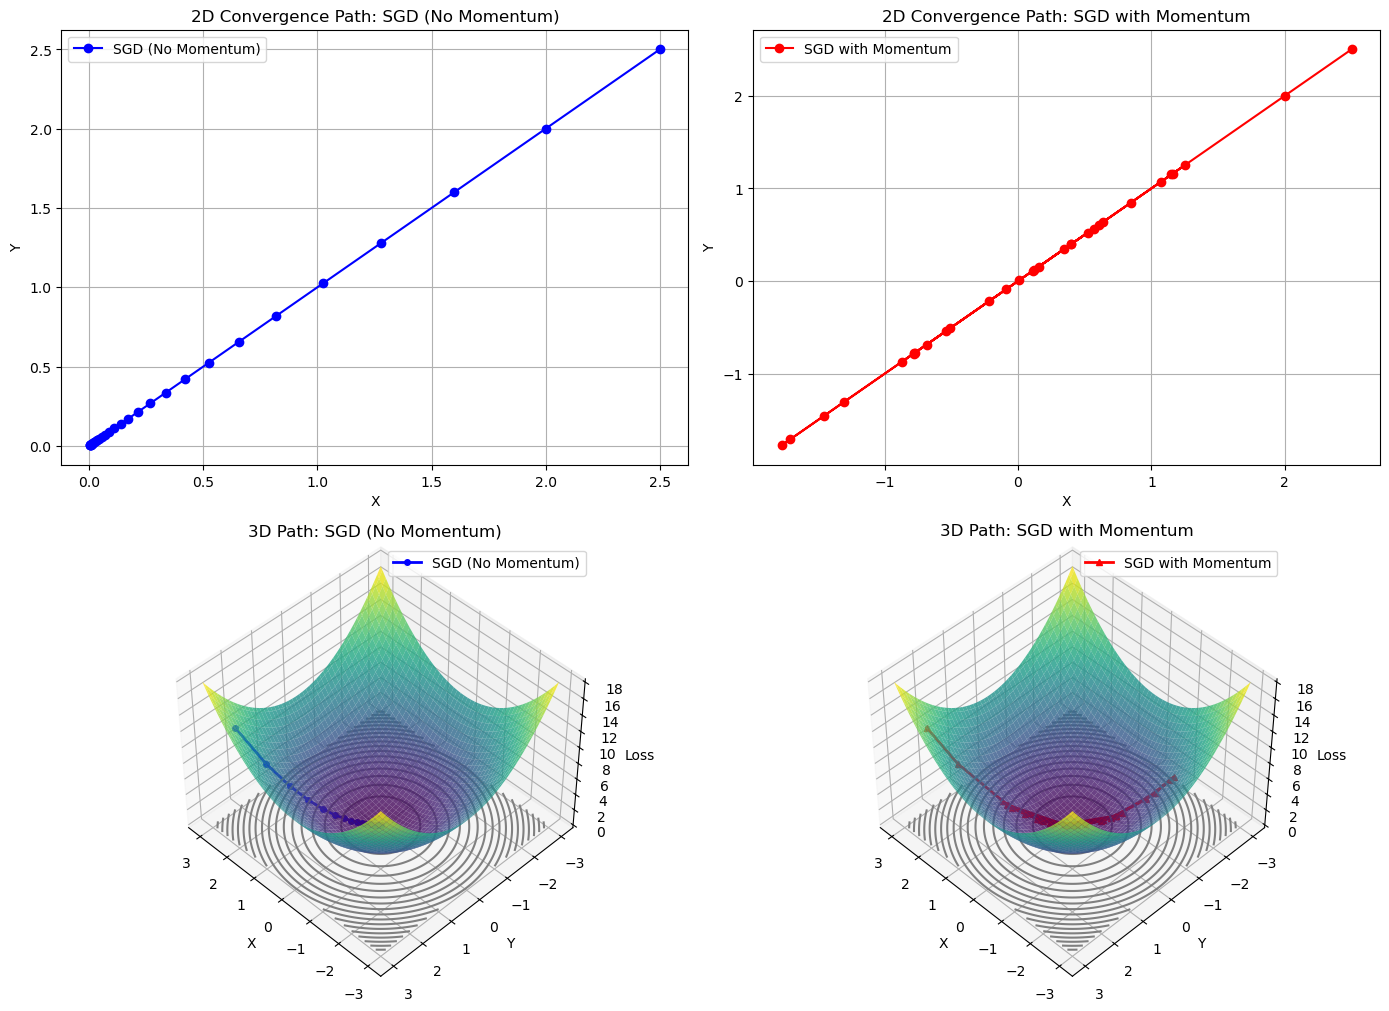

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (required for 3D plotting)

# Loss function and gradient
def loss_surface(x, y):
    return x**2 + y**2

def grad_loss(x, y):
    return np.array([2*x, 2*y])

# Pure SGD (no momentum)
def gd_no_momentum(start, lr, steps):
    point = start.copy()
    path = [point]
    for _ in range(steps):
        grad = grad_loss(point[0], point[1])
        point = point - lr * grad
        path.append(point)
    return np.array(path)

# SGD with momentum
def gd_with_momentum(start, lr, steps, momentum=0.9):
    point = start.copy()
    v = np.array([0.0, 0.0])
    path = [point]
    for _ in range(steps):
        grad = grad_loss(point[0], point[1])
        v = momentum * v + lr * grad
        point = point - v
        path.append(point)
    return np.array(path)

# Parameters
lr = 0.1
steps = 30
start_point = np.array([2.5, 2.5])

# Calculate paths
path_sgd = gd_no_momentum(start_point, lr, steps)
path_momentum = gd_with_momentum(start_point, lr, steps)

# Create grid for surface (for 3D plots)
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = loss_surface(X, Y)

# Create figure and axes (2 rows, 2 cols)
fig = plt.figure(figsize=(14, 10))

# ----------- First row: 2D convergence plots -----------

# Left plot: SGD no momentum (x vs y)
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(path_sgd[:, 0], path_sgd[:, 1], 'o-', color='blue', label='SGD (No Momentum)')
ax1.set_title('2D Convergence Path: SGD (No Momentum)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid(True)
ax1.legend()

# Right plot: SGD with momentum (x vs y)
ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(path_momentum[:, 0], path_momentum[:, 1], 'o-', color='red', label='SGD with Momentum')
ax2.set_title('2D Convergence Path: SGD with Momentum')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid(True)
ax2.legend()

# ----------- Second row: 3D plots -----------

# Left plot: 3D SGD no momentum
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')
ax3.contour(X, Y, Z, 20, colors='gray', linestyles='solid', offset=0)
ax3.plot(path_sgd[:, 0], path_sgd[:, 1], loss_surface(path_sgd[:, 0], path_sgd[:, 1]),
         color='blue', marker='o', markersize=4, linewidth=2, label='SGD (No Momentum)')
ax3.set_title('3D Path: SGD (No Momentum)')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Loss')
ax3.view_init(elev=45, azim=135)
ax3.legend()

# Right plot: 3D SGD with momentum
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')
ax4.contour(X, Y, Z, 20, colors='gray', linestyles='solid', offset=0)
ax4.plot(path_momentum[:, 0], path_momentum[:, 1], loss_surface(path_momentum[:, 0], path_momentum[:, 1]),
         color='red', marker='^', markersize=4, linewidth=2, label='SGD with Momentum')
ax4.set_title('3D Path: SGD with Momentum')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Loss')
ax4.view_init(elev=45, azim=135)
ax4.legend()

plt.tight_layout()
plt.show()


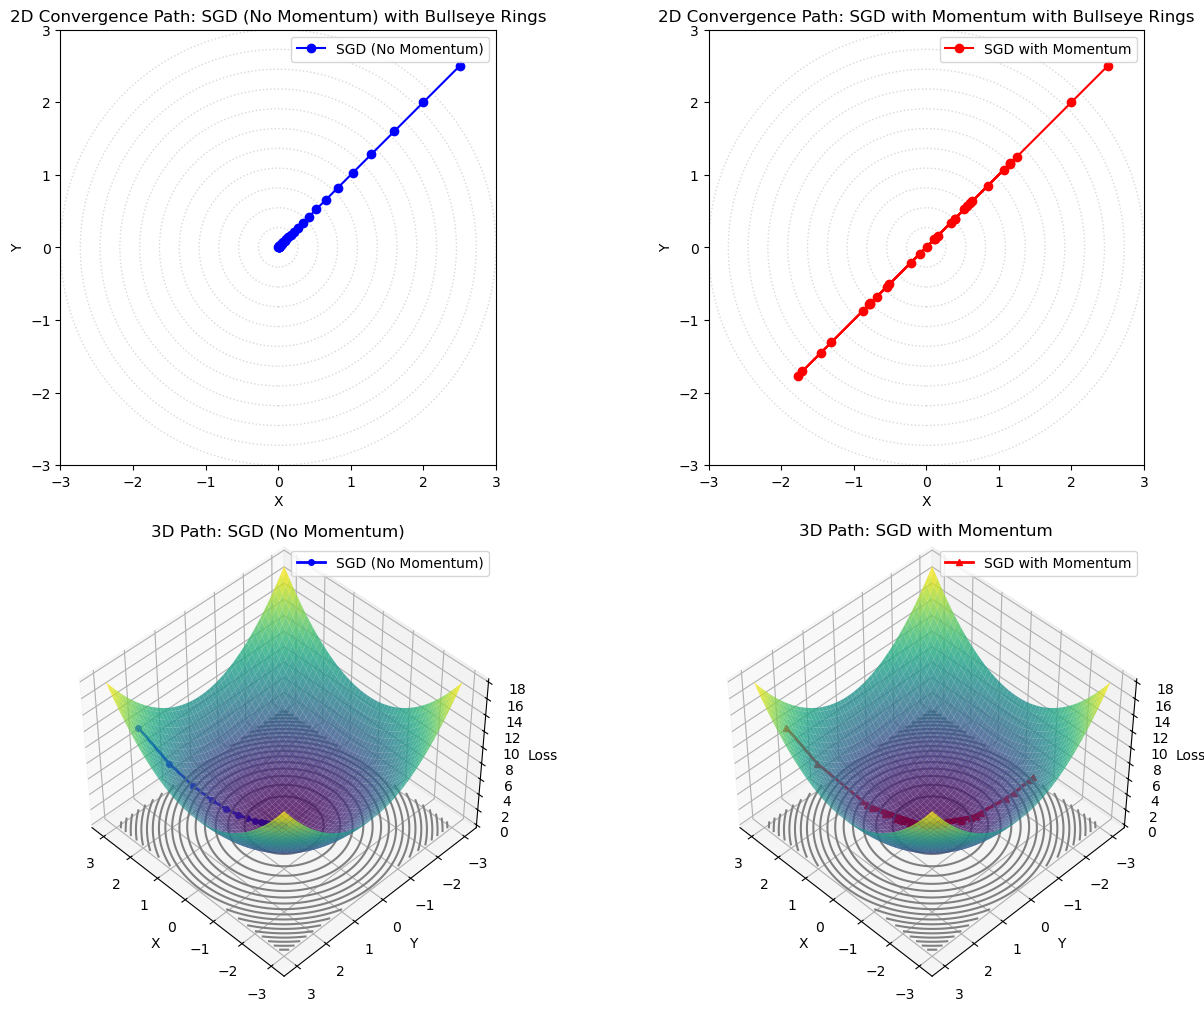

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Loss function (for contour rings)
def loss_surface(x, y):
    return x**2 + y**2

# Create bullseye rings function for 2D plots
def draw_bullseye_rings(ax, max_radius=3, rings=10):
    radii = np.linspace(0, max_radius, rings)
    for r in radii:
        circle = plt.Circle((0, 0), r, color='gray', fill=False, linestyle='dotted', alpha=0.3)
        ax.add_artist(circle)

# --- Setup paths and parameters as before (reuse gd_no_momentum, gd_with_momentum) ---
# I'll skip redefining them here for brevity, just reuse your existing functions and data

# Assuming `path_sgd` and `path_momentum` are defined already
# Parameters for drawing bullseye rings
max_radius = 3
rings = 12

fig = plt.figure(figsize=(14, 10))

# Left plot: SGD no momentum with bullseye rings
ax1 = fig.add_subplot(2, 2, 1)
draw_bullseye_rings(ax1, max_radius=max_radius, rings=rings)
ax1.plot(path_sgd[:, 0], path_sgd[:, 1], 'o-', color='blue', label='SGD (No Momentum)')
ax1.set_title('2D Convergence Path: SGD (No Momentum) with Bullseye Rings')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid(False)  # hide grid to not clutter with rings
ax1.set_xlim([-max_radius, max_radius])
ax1.set_ylim([-max_radius, max_radius])
ax1.set_aspect('equal', 'box')  # keep circles round
ax1.legend()

# Right plot: SGD with momentum with bullseye rings
ax2 = fig.add_subplot(2, 2, 2)
draw_bullseye_rings(ax2, max_radius=max_radius, rings=rings)
ax2.plot(path_momentum[:, 0], path_momentum[:, 1], 'o-', color='red', label='SGD with Momentum')
ax2.set_title('2D Convergence Path: SGD with Momentum with Bullseye Rings')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid(False)
ax2.set_xlim([-max_radius, max_radius])
ax2.set_ylim([-max_radius, max_radius])
ax2.set_aspect('equal', 'box')
ax2.legend()

# --- Bottom row 3D plots as before ---
# (reuse your 3D plots code)

# Create grid for surface
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = loss_surface(X, Y)

# Left 3D: SGD no momentum
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')
ax3.contour(X, Y, Z, 20, colors='gray', linestyles='solid', offset=0)
ax3.plot(path_sgd[:, 0], path_sgd[:, 1], loss_surface(path_sgd[:, 0], path_sgd[:, 1]),
         color='blue', marker='o', markersize=4, linewidth=2, label='SGD (No Momentum)')
ax3.set_title('3D Path: SGD (No Momentum)')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Loss')
ax3.view_init(elev=45, azim=135)
ax3.legend()

# Right 3D: SGD with momentum
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')
ax4.contour(X, Y, Z, 20, colors='gray', linestyles='solid', offset=0)
ax4.plot(path_momentum[:, 0], path_momentum[:, 1], loss_surface(path_momentum[:, 0], path_momentum[:, 1]),
         color='red', marker='^', markersize=4, linewidth=2, label='SGD with Momentum')
ax4.set_title('3D Path: SGD with Momentum')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Loss')
ax4.view_init(elev=45, azim=135)
ax4.legend()

plt.tight_layout()
plt.show()
